##Installing libraries

If you already have following libraries installed then you don't need to install them again

In [24]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install imblearn
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=731a88a8825cc7bbab06c245e8e295dbbfc8059a8f8265bfb2f25d86d8a8ced0
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab

##Importing all the libraries

In [25]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense

##Loading data and applying pre-processing

In [26]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Checking for duplicates**

In [27]:
df.duplicated().sum()

0

**Checking for null values**

In [28]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**Handling null values in bmi column using mean technique**

In [29]:
# Compute the mean of column 'A'
mean_a = df['bmi'].mean()

# Use the fillna() method to fill missing values in column 'A' with the mean value
df['bmi'].fillna(mean_a, inplace=True)

**Different Visuals of data**

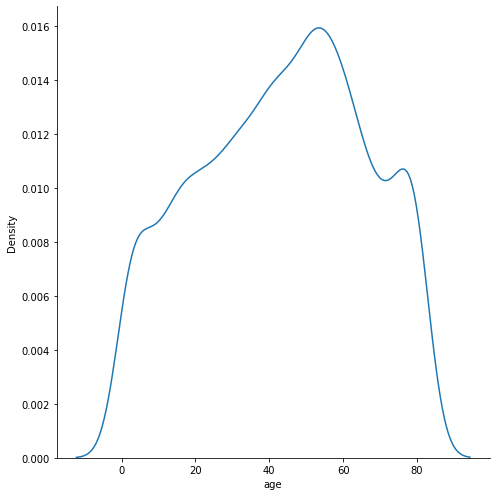

In [30]:
sns.displot(df['age'], kind='kde', height = 7)

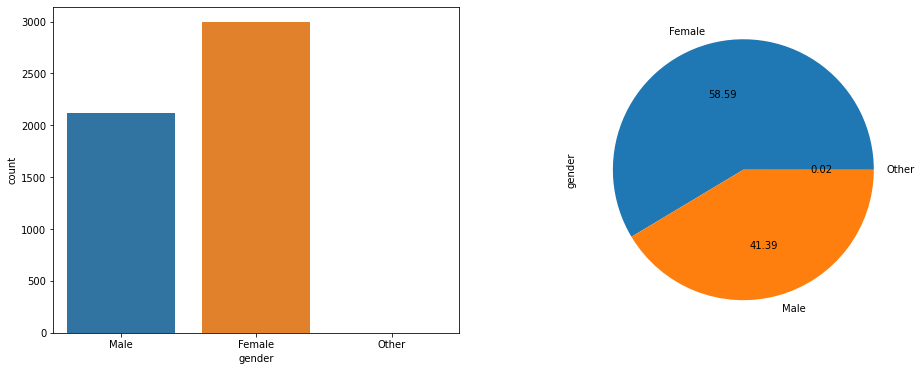

In [31]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(x = df['gender'])
plt.subplot(1,2,2)
df['gender'].value_counts().plot(kind='pie',autopct="%.2f")

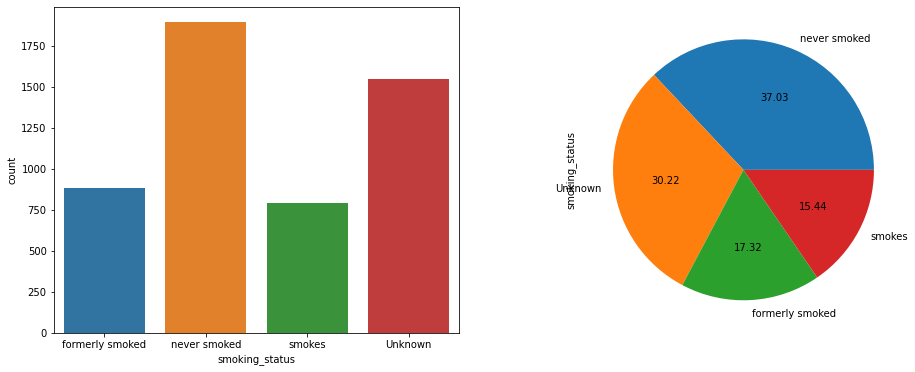

In [32]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(x = df['smoking_status'])
plt.subplot(1,2,2)
df['smoking_status'].value_counts().plot(kind='pie',autopct="%.2f")

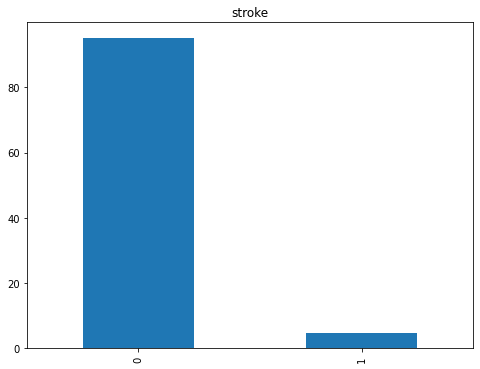

In [33]:
fig , ax = plt.subplots(figsize=(8,6))

df['stroke'].value_counts(normalize=True).mul(100).plot.bar()

plt.title("stroke")
plt.show()

**Separating X and y features**

In [34]:
df.drop(columns=['id'], axis=1, inplace=True)

X = df.iloc[:,0:10]
y = df.iloc[:,10]

In [35]:
X.shape

(5110, 10)

In [36]:
y.shape

(5110,)

**Splitting data for training and testing**

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

**Applying One Hot encoder and Standard scaler on required columns**

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


numerical_cols = ['age', 'avg_glucose_level', 'bmi']
categorical_cols = ['gender', 'ever_married', 'work_type',	'Residence_type', 'smoking_status' ]


numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# create the column transformer for numerical and categorical columns, Remaining coulmns will stay same
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)


# fit and transform the data
preprocessor = preprocessor.fit(X)
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

**Applying smote technique to handle imbalance data**

In [39]:
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train.ravel())

##Logistic Regression

**Training the final model**

In [40]:
ANN_classifier = Sequential()

ANN_classifier.add(Dense(units=8, input_dim=X_train_res.shape[1], activation='sigmoid'))

ANN_classifier.add(Dense(units=8,activation='sigmoid'))
 
ANN_classifier.add(Dense(units=1,activation='sigmoid'))
 
ANN_classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ANN_classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 176       
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = ANN_classifier.fit(X_train_res,y_train_res, batch_size=8 , epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
587/587 [==============================] - 2s 2ms/step - loss: 0.6298 - accuracy: 0.6285 - val_loss: 0.8277 - val_accuracy: 0.2302
Epoch 2/20
587/587 [==============================] - 1s 2ms/step - loss: 0.5376 - accuracy: 0.7213 - val_loss: 0.7648 - val_accuracy: 0.5592
Epoch 3/20
587/587 [==============================] - 1s 2ms/step - loss: 0.4769 - accuracy: 0.7763 - val_loss: 0.6426 - val_accuracy: 0.7613
Epoch 4/20
587/587 [==============================] - 1s 2ms/step - loss: 0.4536 - accuracy: 0.7869 - val_loss: 0.6843 - val_accuracy: 0.7170
Epoch 5/20
587/587 [==============================] - 1s 2ms/step - loss: 0.4458 - accuracy: 0.7867 - val_loss: 0.5870 - val_accuracy: 0.7971
Epoch 6/20
587/587 [==============================] - 1s 2ms/step - loss: 0.4423 - accuracy: 0.7852 - val_loss: 0.6154 - val_accuracy: 0.7775
Epoch 7/20
587/587 [==============================] - 1s 2ms/step - loss: 0.4403 - accuracy: 0.7837 - val_loss: 0.6158 - val_accuracy: 0.7698
Epoch 

##Model Evaluation

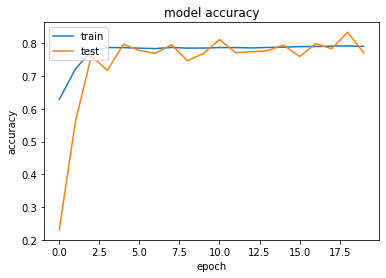

In [42]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

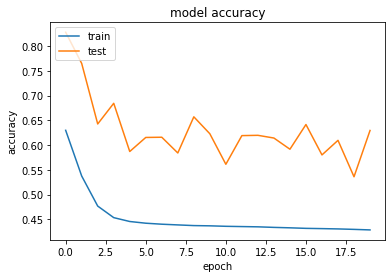

In [43]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Different Metrics**

In [44]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_auc_score

# Make predictions on the test set
predictions = ANN_classifier.predict(X_test)
predictions = predictions>0.5

# Compute evaluation metrics
acc = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

# Print the evaluation metrics
print('Accuracy: {:.3f}' .format(acc))
print('Precision: {:.3f}' .format(precision))
print('Recall: {:.3f}' .format(recall))
print('F1 Score {:.3f}' .format(f1))
print('ROC AUC: {:.3f}' .format(roc_auc))

64/64 [==============================] - 0s 1ms/step
Accuracy: 0.784
Precision: 0.154
Recall: 0.640
F1 Score 0.249
ROC AUC: 0.717


**Classification Report**

In [45]:
from sklearn.metrics import classification_report as rep
report = rep(predictions,y_test)
print(report)

              precision    recall  f1-score   support

       False       0.79      0.97      0.87      1571
        True       0.64      0.15      0.25       473

    accuracy                           0.78      2044
   macro avg       0.72      0.56      0.56      2044
weighted avg       0.76      0.78      0.73      2044



**Confusion Matrix**

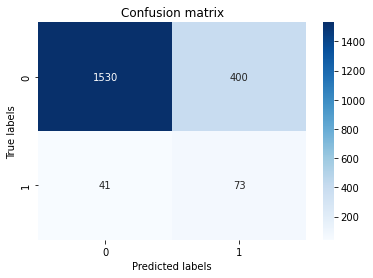

In [46]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, predictions)

# Create a heatmap visualization of the matrix
sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt='d')

# Add labels to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')

# Show the plot
plt.show()

##Results

We can see that our data was imbalanced but even with that neural network performed good as we can see it did not favoured the majority class and performed well for minority class as well. 

In an imbalanced dataset, the classifier may tend to predict the majority class more frequently, resulting in low recall and high precision scores. This can lead to a high accuracy score, despite the model not performing well on the minority class.
